In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp

In [3]:
def simulate_sample_photometry_dpl(nsamples, spectra=False):

    #Define SPS Model
    sps_model = sps.initialise_sps_model(sfh_type=3, dust_type=2)
    bounds = hyp.define_hyperparameter_bounds()
    hyperparams = hyp.sample_hyper_parameters(bounds)
    i = 0
    photo_data = []
    source_data = []
    while(i <  nsamples):

        #Update Model and draw Priors
        sps_params = pop.galaxy_population_model_dpl(hyperparams)
        sps.update_sps_model_dpl(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(sps.simulate_photometry_lsst_fsps(sps_model, logmass=sps_params[15]))
        source_data.append(sps_params)

        #Plot Spectra
        if(spectra):
            spectrum = sps.simulate_sed(sps_model, sps_params)
            
            sps.plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            
            sps.plot_lsst_filters(factor=1)

        i+=1

    return [np.asarray(photo_data), np.asarray(source_data), hyperparams]

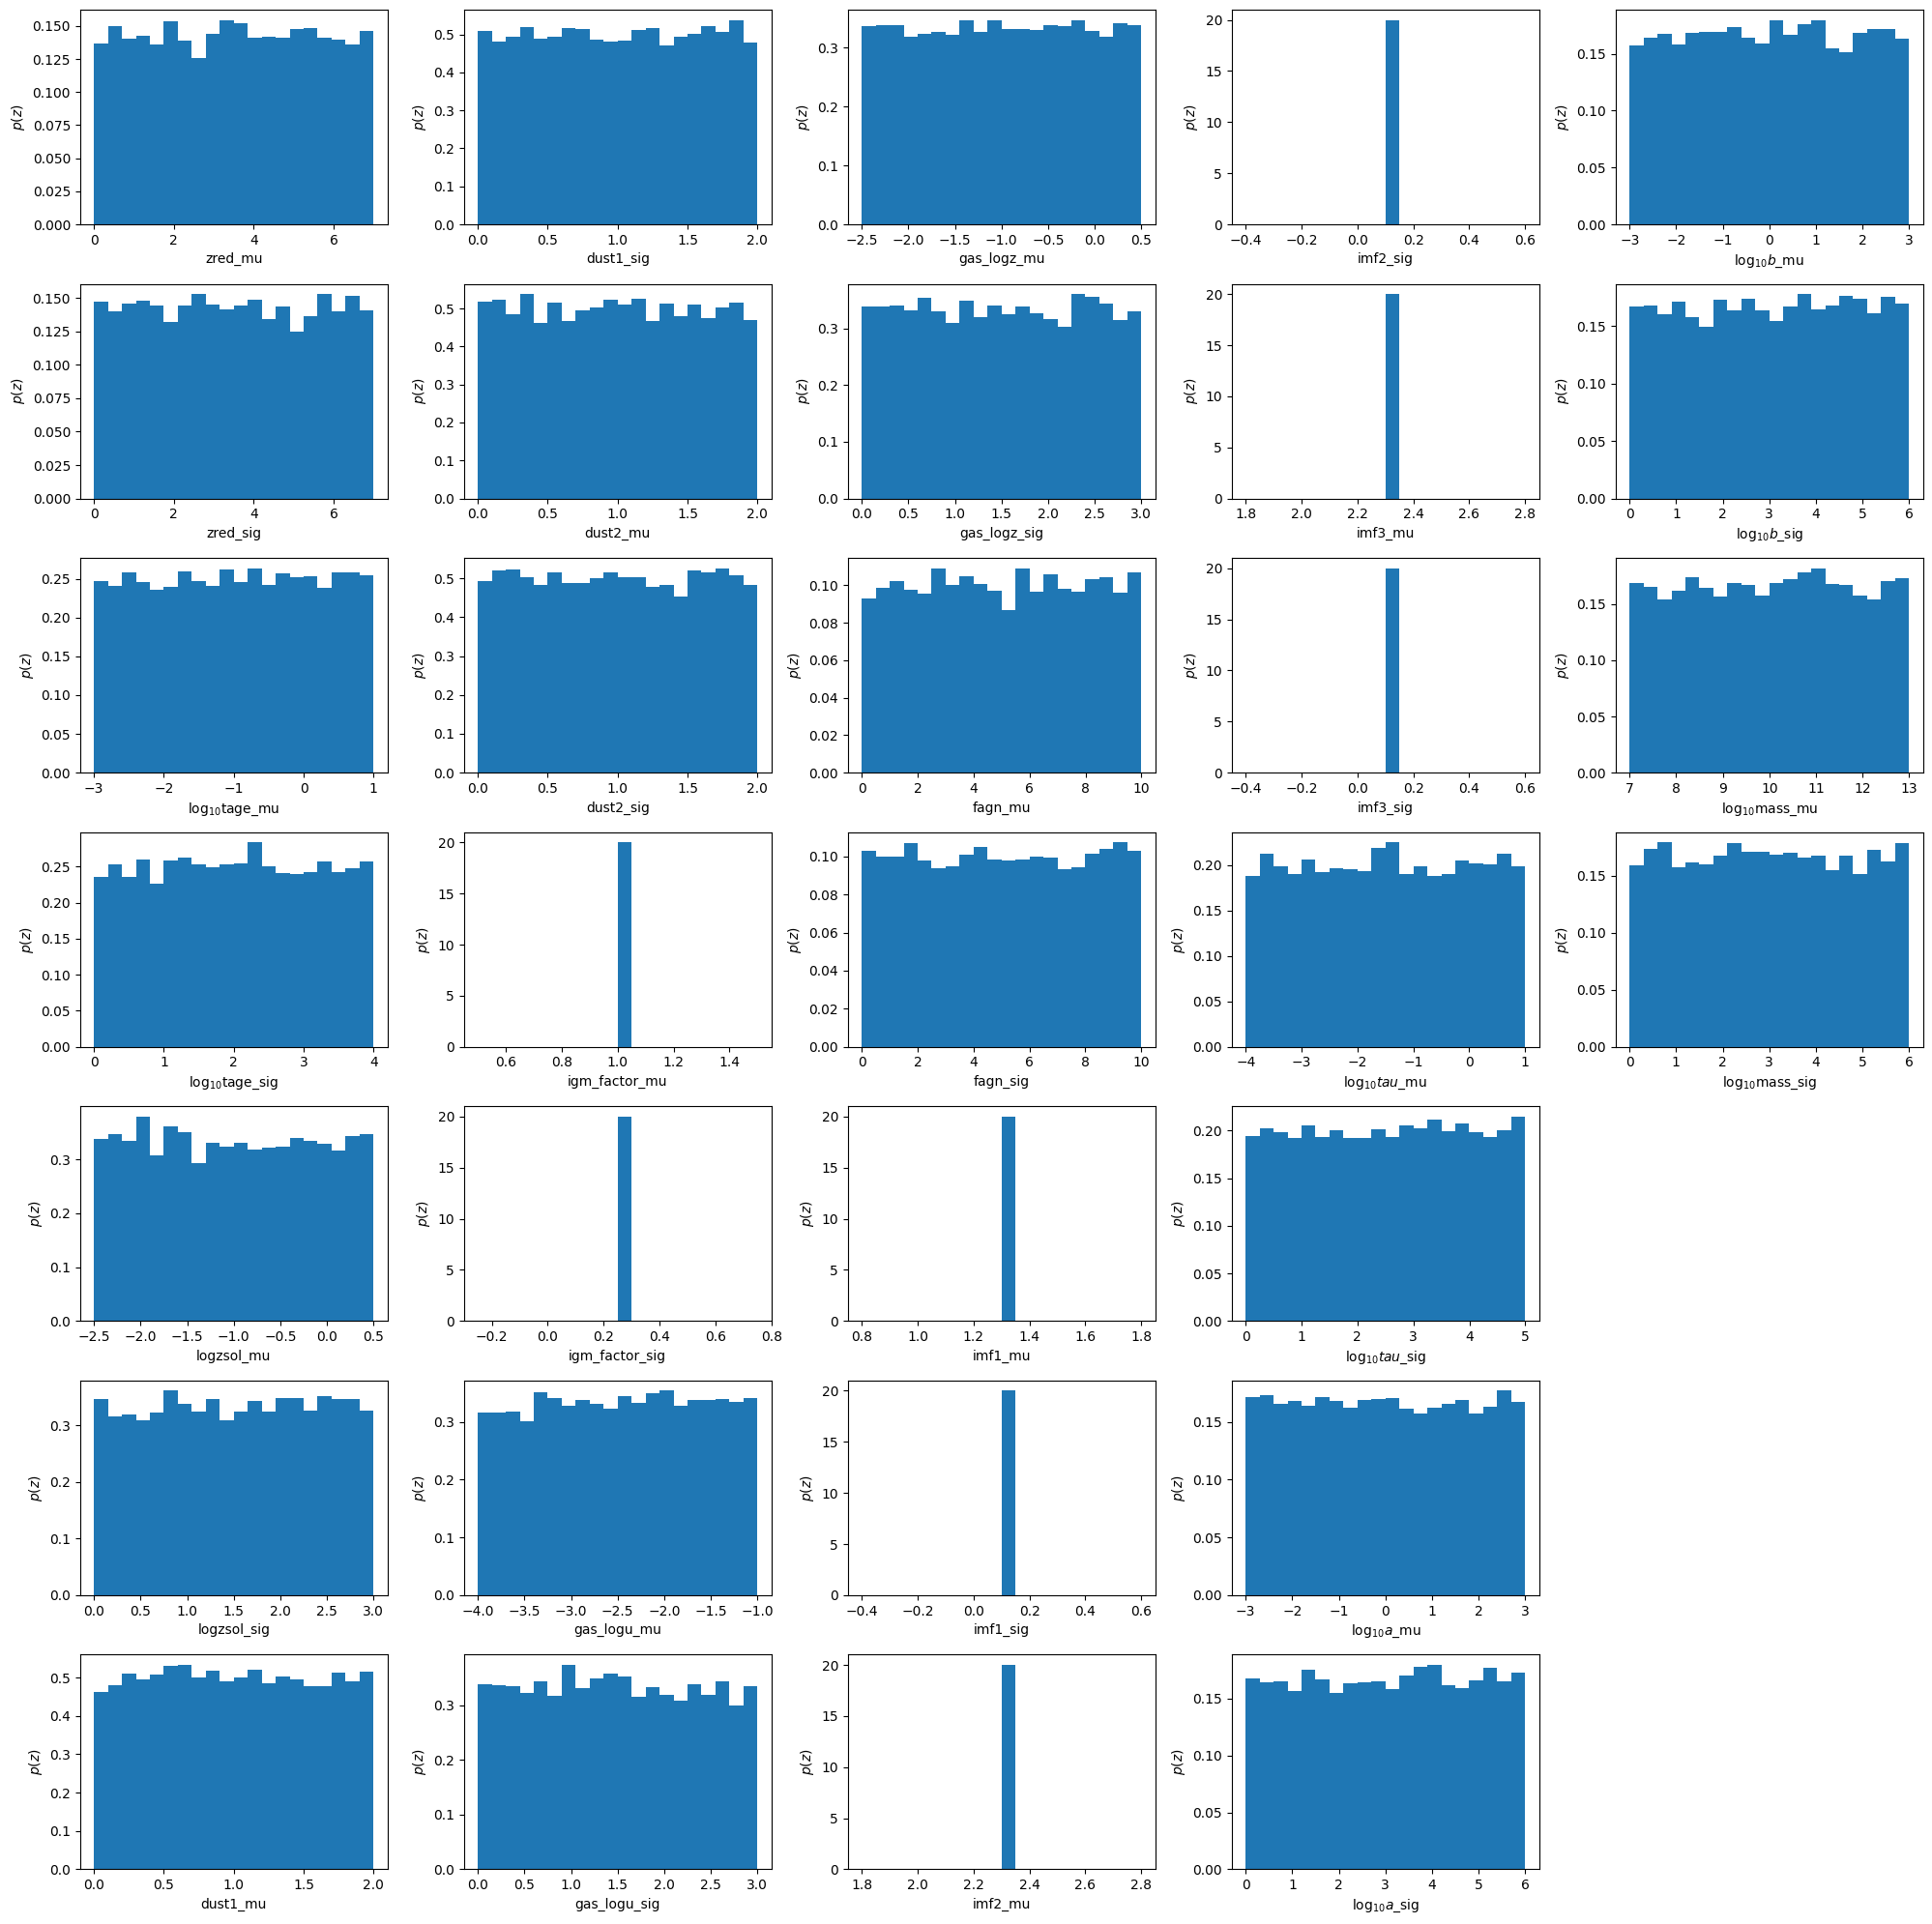

In [4]:
hyp.plot_hyperparameters(10000, hyp.define_hyperparameter_bounds(), rows=7, nbins=20)

In [5]:
data = simulate_sample_photometry_dpl(1)
print(data)

[array([[44.37654844, 38.47685085, 36.23602178, 35.00412152, 34.5459461 ,
        34.13116279]]), array([[ 4.81709529, -3.06649308, -1.03361658,  1.00984243,  1.40028544,
         1.15549077, -2.54762132,  0.07125749,  4.02280657,  1.34432827,
         2.25497118,  2.31408225, -3.20918975, -1.73587524,  0.011912  ,
         7.19556547]]), array([[ 2.12151097,  3.68793699],
       [-2.56190474,  0.28277473],
       [-0.8278844 ,  1.32125161],
       [ 1.77785066,  1.50742551],
       [ 0.59262842,  1.83750713],
       [ 1.        ,  0.25      ],
       [-3.00201167,  2.92362203],
       [-0.27270929,  0.33456414],
       [ 6.41947347,  3.6104729 ],
       [ 1.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [-1.53842604,  3.16509069],
       [-1.36558522,  0.54177511],
       [-1.92335404,  1.97591472],
       [ 9.53631659,  3.71295699]])]


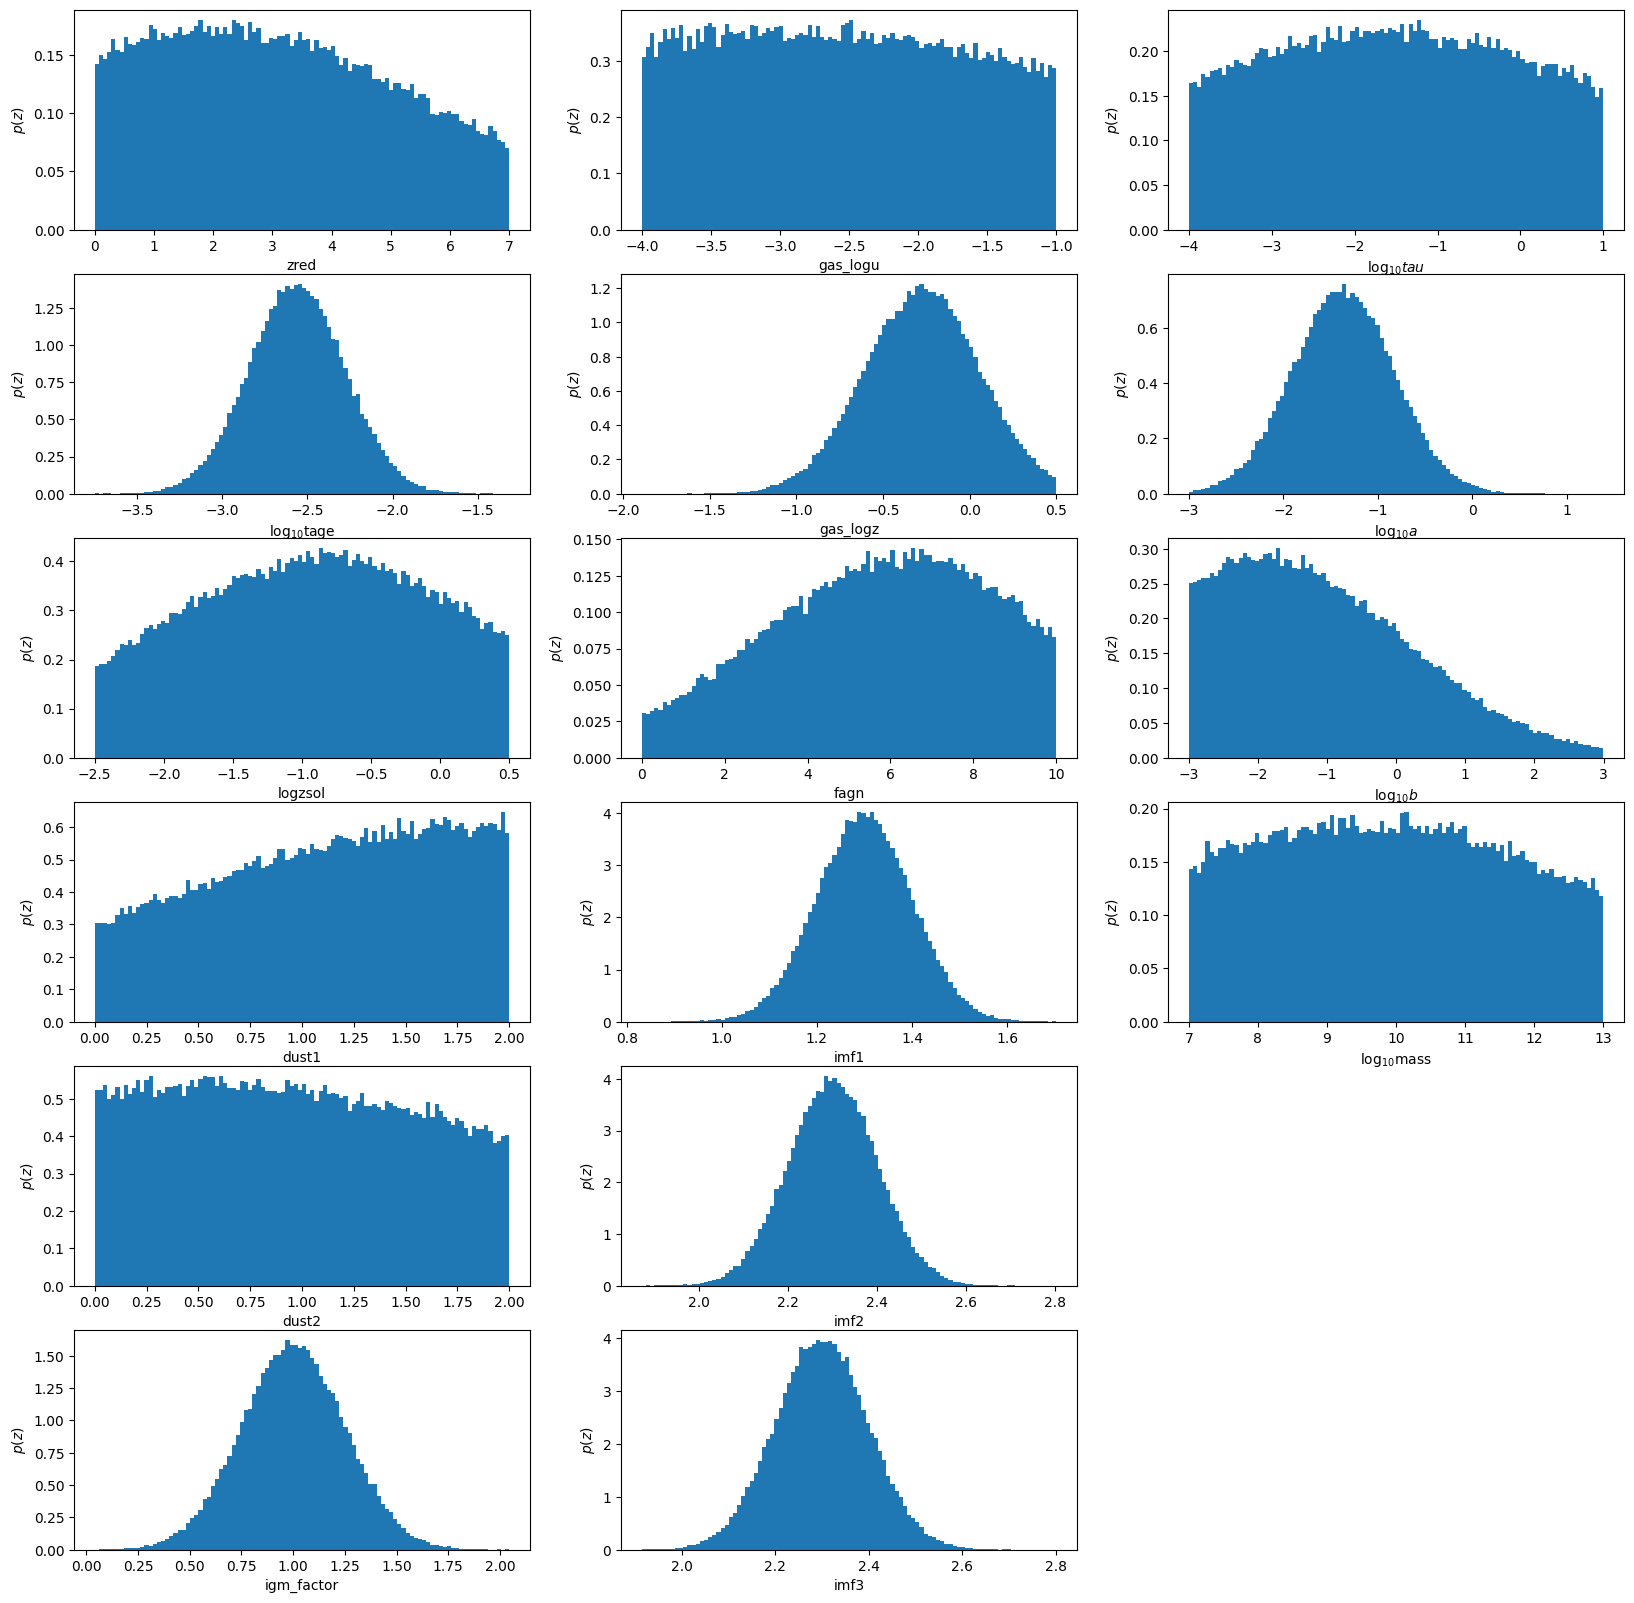

In [6]:
pop.plot_galaxy_population(100000, hparams=data[2], rows=6, nbins=100)